# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import requests
import config
import json
import pandas as pd


In [2]:
data=pd.read_csv(r'C:\Users\owner\Documents\Flatiron\solid-spoon\solid-spoon\data1.csv')

In [3]:
data['extendedIngredients']

0       [{'id': 11090, 'aisle': 'Produce', 'image': 'b...
1       [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
2       [{'id': 9040, 'aisle': 'Produce', 'image': 'ba...
3       [{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...
4       [{'id': 16018, 'aisle': 'Canned and Jarred', '...
                              ...                        
1595    [{'id': 10111352, 'aisle': 'Frozen', 'image': ...
1596    [{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...
1597    [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
1598    [{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...
1599    [{'id': 20012, 'aisle': 'Pasta and Rice;Ethnic...
Name: extendedIngredients, Length: 1600, dtype: object

In [4]:
#check for duplicates
data.duplicated(subset=['id'])

0       False
1       False
2       False
3       False
4       False
        ...  
1595     True
1596     True
1597     True
1598     True
1599     True
Length: 1600, dtype: bool

In [5]:
data=data.drop_duplicates(subset=['id'])

In [6]:
data.shape

(1000, 44)

In [7]:
data.head()

,Unnamed: 0,vegetarian,vegan,glutenFree,dairyFree,veryHealthy,cheap,veryPopular,sustainable,weightWatcherSmartPoints,...,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,likes,usedIngredients,unusedIngredients,preparationMinutes,cookingMinutes,author
0,0,True,True,True,True,True,False,True,False,4,...,https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",0,[],[],NaN,NaN,NaN
1,1,True,True,False,True,True,False,True,False,19,...,https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",0,[],[],NaN,NaN,NaN
2,2,True,False,False,False,True,False,True,False,15,...,https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",0,[],[],5.0,0.0,NaN
3,3,True,True,True,True,True,False,False,False,5,...,https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",0,[],[],NaN,NaN,NaN
4,4,False,False,True,True,True,False,True,False,10,...,https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",0,[],[],NaN,NaN,NaN


In [8]:
list(data.columns)

['Unnamed: 0',
 'vegetarian',
 'vegan',
 'glutenFree',
 'dairyFree',
 'veryHealthy',
 'cheap',
 'veryPopular',
 'sustainable',
 'weightWatcherSmartPoints',
 'gaps',
 'lowFodmap',
 'aggregateLikes',
 'spoonacularScore',
 'healthScore',
 'creditsText',
 'license',
 'sourceName',
 'pricePerServing',
 'extendedIngredients',
 'id',
 'title',
 'readyInMinutes',
 'servings',
 'sourceUrl',
 'image',
 'imageType',
 'nutrition',
 'summary',
 'cuisines',
 'dishTypes',
 'diets',
 'occasions',
 'analyzedInstructions',
 'spoonacularSourceUrl',
 'usedIngredientCount',
 'missedIngredientCount',
 'missedIngredients',
 'likes',
 'usedIngredients',
 'unusedIngredients',
 'preparationMinutes',
 'cookingMinutes',
 'author']

Dropping data that will not be used.

In [9]:
data=data.drop(columns=['Unnamed: 0',
 'vegetarian',
 'vegan',
 'glutenFree',
 'dairyFree',
 'veryHealthy',
 'cheap',
 'veryPopular',
 'sustainable',
 'weightWatcherSmartPoints',
 'gaps',
 'lowFodmap',
 'creditsText',
 'license',
 'sourceName',
 'pricePerServing',
 'readyInMinutes',
 'image',
 'imageType',
 'summary',
 'cuisines',
 'occasions',
 'analyzedInstructions',
 'likes',
 'preparationMinutes',
 'cookingMinutes',
 'author'])

In [10]:
data

,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients
0,3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[]
1,1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[]
2,689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[]
3,19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[]
4,1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,76.0,24.0,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ...",660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[]
996,0,76.0,46.0,"[{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...",157081,Omega-3 Creamy Leek Soup,2,http://spoonacular.com/-1381436006147,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'primal', 'pescatarian']",https://spoonacular.com/omega-3-creamy-leek-so...,0,8,"[{'id': 1053, 'amount': 250.0, 'unit': 'ml', '...",[],[]
997,1,76.0,36.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",661351,Spinach Soup With Wontons,4,http://www.foodista.com/recipe/VPKSZHYP/spinac...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],[],https://spoonacular.com/spinach-soup-with-wont...,0,8,"[{'id': 2044, 'amount': 1.0, 'unit': 'teaspoon...",[],[]
998,1,76.0,37.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK/roaste...,"{'nutrients': [{'name': 'Calories', 'title': '...",['salad'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/roasted-butternut-squa...,0,8,"[{'id': 10123, 'amount': 5.0, 'unit': 'slices'...",[],[]


In [11]:
data.isnull().sum().sum()

0

## EDA
Time to explore the data to better understand the dataset.

In [12]:
data.head()

,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients
0,3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[]
1,1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[]
2,689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[]
3,19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[]
4,1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[]


In [13]:
data = data[['id', 'title', 'servings', 'sourceUrl', 'nutrition', 'dishTypes', 'diets', 'spoonacularSourceUrl', 'usedIngredientCount','missedIngredientCount','missedIngredients', 'usedIngredients', 'unusedIngredients', 'aggregateLikes','spoonacularScore', 'healthScore', 'extendedIngredients']]

In [14]:
data

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[],3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b..."
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[],1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea..."
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba..."
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr..."
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[],1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[],6,76.0,24.0,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ..."
996,157081,Omega-3 Creamy Leek Soup,2,http://spoonacular.com/-1381436006147,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'primal', 'pescatarian']",https://spoonacular.com/omega-3-creamy-leek-so...,0,8,"[{'id': 1053, 'amount': 250.0, 'unit': 'ml', '...",[],[],0,76.0,46.0,"[{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair..."
997,661351,Spinach Soup With Wontons,4,http://www.foodista.com/recipe/VPKSZHYP/spinac...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],[],https://spoonacular.com/spinach-soup-with-wont...,0,8,"[{'id': 2044, 'amount': 1.0, 'unit': 'teaspoon...",[],[],1,76.0,36.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea..."
998,658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK/roaste...,"{'nutrients': [{'name': 'Calories', 'title': '...",['salad'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/roasted-butternut-squa...,0,8,"[{'id': 10123, 'amount': 5.0, 'unit': 'slices'...",[],[],1,76.0,37.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-..."


I need to pull the details from the extendedIngredients column so that there is a single column for each ingredient in order to use the ingredient data in my recommendation model.

In [15]:
data['extendedIngredients']

0      [{'id': 11090, 'aisle': 'Produce', 'image': 'b...
1      [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
2      [{'id': 9040, 'aisle': 'Produce', 'image': 'ba...
3      [{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...
4      [{'id': 16018, 'aisle': 'Canned and Jarred', '...
                             ...                        
995    [{'id': 10111352, 'aisle': 'Frozen', 'image': ...
996    [{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...
997    [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
998    [{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...
999    [{'id': 20012, 'aisle': 'Pasta and Rice;Ethnic...
Name: extendedIngredients, Length: 1000, dtype: object

In [16]:
#accessing the first row of the extendedIngredients data
first=data['extendedIngredients'].iloc[0]

In [17]:
#Viewing the first row of extendedIngredients data
eval(first)

[{'id': 11090,
  'aisle': 'Produce',
  'image': 'broccoli.jpg',
  'consistency': 'solid',
  'name': 'broccoli',
  'nameClean': 'broccoli',
  'original': '2 cups cooked broccoli, chopped small',
  'originalString': '2 cups cooked broccoli, chopped small',
  'originalName': 'cooked broccoli, chopped small',
  'amount': 2.0,
  'unit': 'cups',
  'meta': ['cooked', 'chopped'],
  'metaInformation': ['cooked', 'chopped'],
  'measures': {'us': {'amount': 2.0, 'unitShort': 'cups', 'unitLong': 'cups'},
   'metric': {'amount': 473.176,
    'unitShort': 'ml',
    'unitLong': 'milliliters'}}},
 {'id': 11135,
  'aisle': 'Produce',
  'image': 'cauliflower.jpg',
  'consistency': 'solid',
  'name': 'cauliflower',
  'nameClean': 'cauliflower',
  'original': '1 head of cauliflower, raw',
  'originalString': '1 head of cauliflower, raw',
  'originalName': 'cauliflower, raw',
  'amount': 1.0,
  'unit': 'head',
  'meta': ['raw'],
  'metaInformation': ['raw'],
  'measures': {'us': {'amount': 1.0, 'unitShort'

In [18]:
#confirming that correct information is pulling from the data for the first row
eval(first)[0]['id']

11090

In [19]:
#creating a function that lists all the ingredient ids of the first recipe
def ids(text):
    ids=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        ids.append(item['id'])
    return ids


In [20]:
#viewing the ingredient ids of the first recipe
ids(first)

[11090,
 11135,
 4047,
 20041,
 11215,
 4517,
 16424,
 11304,
 2047,
 11291,
 11291,
 4058,
 12023]

In [21]:
#creating lambda function that stores all the ingredient IDs as a data point
data['ingredid'] = data['extendedIngredients'].map(lambda x: ids(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#View new ingredid column data
data['ingredid']

0      [11090, 11135, 4047, 20041, 11215, 4517, 16424...
1           [2044, 20081, 1022020, 1062047, 11362, 4513]
2                    [9040, 10018617, 16223, 9316, 1119]
3                             [2069, 11215, 11233, 4053]
4      [16018, 11980, 10011693, 6194, 11819, 11165, 1...
                             ...                        
995    [10111352, 11297, 2063, 2049, 11215, 9152, 915...
996    [1053, 2045, 9152, 11246, 11304, 15076, 110204...
997    [2044, 6194, 6972, 11463, 1037, 1002030, 11291...
998    [10123, 1002030, 11485, 1002046, 1034053, 1991...
999    [20012, 20081, 4053, 2047, 1102047, 10011457, ...
Name: ingredid, Length: 1000, dtype: object

In [23]:
#creating functions to create new columns for the rest of the data that was in the original extended ingredients column (aisle, name,original name, amount, unit and meta)
def aisle(text):
    aisles=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        aisles.append(item['aisle'])
    return aisles

In [24]:
data['aisle'] = data['extendedIngredients'].map(lambda x: aisle(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data['aisle']

0      [Produce, Produce, Health Foods;Baking, Pasta ...
1      [Produce;Spices and Seasonings, Baking, Spices...
2      [Produce, Sweet Snacks;Baking, Milk, Eggs, Oth...
3      [Oil, Vinegar, Salad Dressing, Produce, Produc...
4      [Canned and Jarred, Canned and Jarred, Canned ...
                             ...                        
995    [Frozen, Produce;Spices and Seasonings, Produc...
996    [Milk, Eggs, Other Dairy, Produce;Spices and S...
997    [Produce;Spices and Seasonings, Canned and Jar...
998    [Meat, Spices and Seasonings, Produce, Condime...
999    [Pasta and Rice;Ethnic Foods;Health Foods, Bak...
Name: aisle, Length: 1000, dtype: object

In [26]:
def name(text):
    names=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        names.append(item['name'])
    return names

In [27]:
data['name'] = data['extendedIngredients'].map(lambda x: name(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
def originalName(text):
    orignames=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        orignames.append(item['originalName'])
    return orignames

In [29]:
data['originalName'] = data['extendedIngredients'].map(lambda x: originalName(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
def amount(text):
    amounts=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        amounts.append(item['amount'])
    return amounts

In [31]:
data['amount'] = data['extendedIngredients'].map(lambda x: amount(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
def unit(text):
    units=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        units.append(item['unit'])
    return units

In [33]:
data['unit'] = data['extendedIngredients'].map(lambda x: unit(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
def meta(text):
    metas=[]
    ingredientslist=eval(text)
    for item in ingredientslist:
        metas.append(item['meta'])
    return metas

In [35]:
data['meta'] = data['extendedIngredients'].map(lambda x: meta(x))

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
#reviewing the changes I made to columns
data.head()

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,...,spoonacularScore,healthScore,extendedIngredients,ingredid,aisle,name,originalName,amount,unit,meta
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,...,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...","[11090, 11135, 4047, 20041, 11215, 4517, 16424...","[Produce, Produce, Health Foods;Baking, Pasta ...","[broccoli, cauliflower, coconut oil, cooked br...","[cooked broccoli, chopped small, cauliflower, ...","[2.0, 1.0, 1.0, 3.0, 5.0, 1.0, 3.0, 1.0, 8.0, ...","[cups, head, , cups, cloves, , T, cup, serving...","[[cooked, chopped], [raw], [], [cold, cooked],..."
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,...,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...","[2044, 20081, 1022020, 1062047, 11362, 4513]","[Produce;Spices and Seasonings, Baking, Spices...","[basil, flour, garlic powder, garlic salt, pot...","[basil, flour, garlic powder, garlic salt with...","[0.25, 1.0, 0.25, 2.0, 4.0, 2.0]","[cup, cup, , servings, , servings]","[[], [], [], [with parsley (to sprinkle)], [fr..."
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,...,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...","[9040, 10018617, 16223, 9316, 1119]","[Produce, Sweet Snacks;Baking, Milk, Eggs, Oth...","[banana, graham cracker crumbs, soy milk, stra...","[mashed banana, graham cracker crumbs, soy mil...","[0.25, 2.0, 1.0, 0.5, 1.0]","[cup, tbsp, cup, cup, container]","[[mashed], [], [], [], []]"
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,...,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...","[2069, 11215, 11233, 4053]","[Oil, Vinegar, Salad Dressing, Produce, Produc...","[balsamic vinegar, garlic, kale, olive oil]","[balsamic vinegar, garlic, minced, curly kale,...","[3.0, 1.0, 1.0, 2.0]","[tablespoons, clove, bunch, servings]","[[], [minced], [chopped], []]"
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,...,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...","[16018, 11980, 10011693, 6194, 11819, 11165, 1...","[Canned and Jarred, Canned and Jarred, Canned ...","[canned black beans, canned green chile pepper...","[black beans (drained), chopped green chile pe...","[15.0, 4.0, 28.0, 1.0, 2.0, 0.25, 1.0, 2.0, 1....","[oz, oz, oz, oz, tsp, cup, , , cups, can]","[[drained, canned, ()], [green, chopped, canne..."


In [37]:
#create dummies of the ingred ids
ingred_dummies = pd.get_dummies(data['ingredid'].explode()).sum(level=0)

In [38]:
#add dummies to df
data=pd.concat([data, ingred_dummies], axis=1)

In [39]:
#looking at the new df head
data.head()

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,...,11320420,11420420,11420421,11520420,11911111,12011111,12020420,12120420,12220420,13811111
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,...,0,0,0,0,0,0,0,0,0,0
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,...,0,0,0,0,0,0,0,0,0,0
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,...,0,0,0,0,0,0,0,0,0,0
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,...,0,0,0,0,0,0,0,0,0,0
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#looking at a single row
data.iloc[1]

id                                                      715594
title                   Homemade Garlic and Basil French Fries
servings                                                     2
sourceUrl       http://www.pinkwhen.com/homemade-french-fries/
nutrition    {'nutrients': [{'name': 'Calories', 'title': '...
                                   ...                        
12011111                                                     0
12020420                                                     0
12120420                                                     0
12220420                                                     0
13811111                                                     0
Name: 1, Length: 1092, dtype: object

In [41]:
#for i in data.ingredid:
    #print (i)

In [42]:
#access unique ingredients
uniqueingred=data['ingredid'].apply(pd.Series).stack().unique()
uniqueingred.sort()

In [43]:
uniqueingred

array([1.0010000e+03, 1.0040000e+03, 1.0060000e+03, ..., 1.2120420e+07,
       1.2220420e+07, 1.3811111e+07])

In [44]:
def recipes_per_ingredient(uniqueingred, data):
        try:
            return data.groupby('id').count()["uniqueingred"].loc[1]
        except KeyError:
            return None

In [45]:
ingredient_names = data['ingredid'].apply(pd.Series).stack().unique()

In [46]:
#determine how many recipes per ingredient to learn if data is imbalanced
def count_recipes_per_ingredient(ingredid,data):
    try:
        return data.groupby(ingredid).count().loc[1]
    except Keyerror:
        return None

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#looking at the column of one ingredient
data[11320420]

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: 11320420, Length: 1000, dtype: uint8

In [49]:
data[11320420].sum()

3

In [51]:
data.sum(axis=0)

id                                                   684753226
title        Cauliflower, Brown Rice, and Vegetable Fried R...
servings                                                  4343
sourceUrl    http://fullbellysisters.blogspot.com/2012/01/c...
nutrition    {'nutrients': [{'name': 'Calories', 'title': '...
                                   ...                        
12011111                                                     2
12020420                                                     1
12120420                                                     1
12220420                                                     2
13811111                                                     1
Length: 1092, dtype: object

In [52]:
data.loc['total']= data.sum()

In [53]:
#looking at all the column titles
for col in data.columns: 
    print(col)

id
title
servings
sourceUrl
nutrition
dishTypes
diets
spoonacularSourceUrl
usedIngredientCount
missedIngredientCount
missedIngredients
usedIngredients
unusedIngredients
aggregateLikes
spoonacularScore
healthScore
extendedIngredients
ingredid
aisle
name
originalName
amount
unit
meta
1001
1004
1006
1009
1011
1012
1014
1017
1019
1020
1022
1023
1025
1026
1033
1035
1036
1037
1038
1040
1049
1053
1056
1067
1077
1082
1085
1088
1090
1095
1097
1116
1117
1118
1119
1123
1124
1125
1129
1145
1154
1159
1174
1179
1185
1199
1214
1226
1228
1230
1251
1256
2001
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2031
2032
2033
2034
2036
2037
2038
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2053
2054
2055
2063
2064
2066
2069
2073
4025
4042
4047
4053
4058
4073
4114
4135
4513
4517
4528
4574
4576
4581
4582
4583
4584
4609
4639
4641
4673
4679
5006
5027
5062
5064
5091
5096
5109
5114
5157
5165
5317
5332
5348
5662
5696
6008
6016
60

In [54]:
data.apply(lambda column: column[1001 : 13811111].sum(),axis=1)

0          0
1          0
2          0
3          0
4          0
        ... 
996        0
997        0
998        0
999        0
total    539
Length: 1001, dtype: int64

In [55]:
#selecting subdata to use for the bar chart
subdata=data.iloc[1000, 24:]

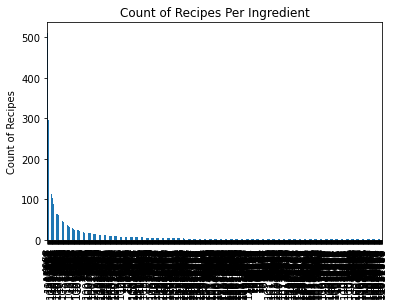

<Figure size 360x7200 with 0 Axes>

In [58]:
#count of recipes per ingredient
ax2=subdata.sort_values(ascending=False).plot(
    kind='bar', stacked=False)

ax2.set_ylabel("Count of Recipes")
ax2.set_title("Count of Recipes Per Ingredient")
plt.figure(figsize=(5,100))
plt.show()

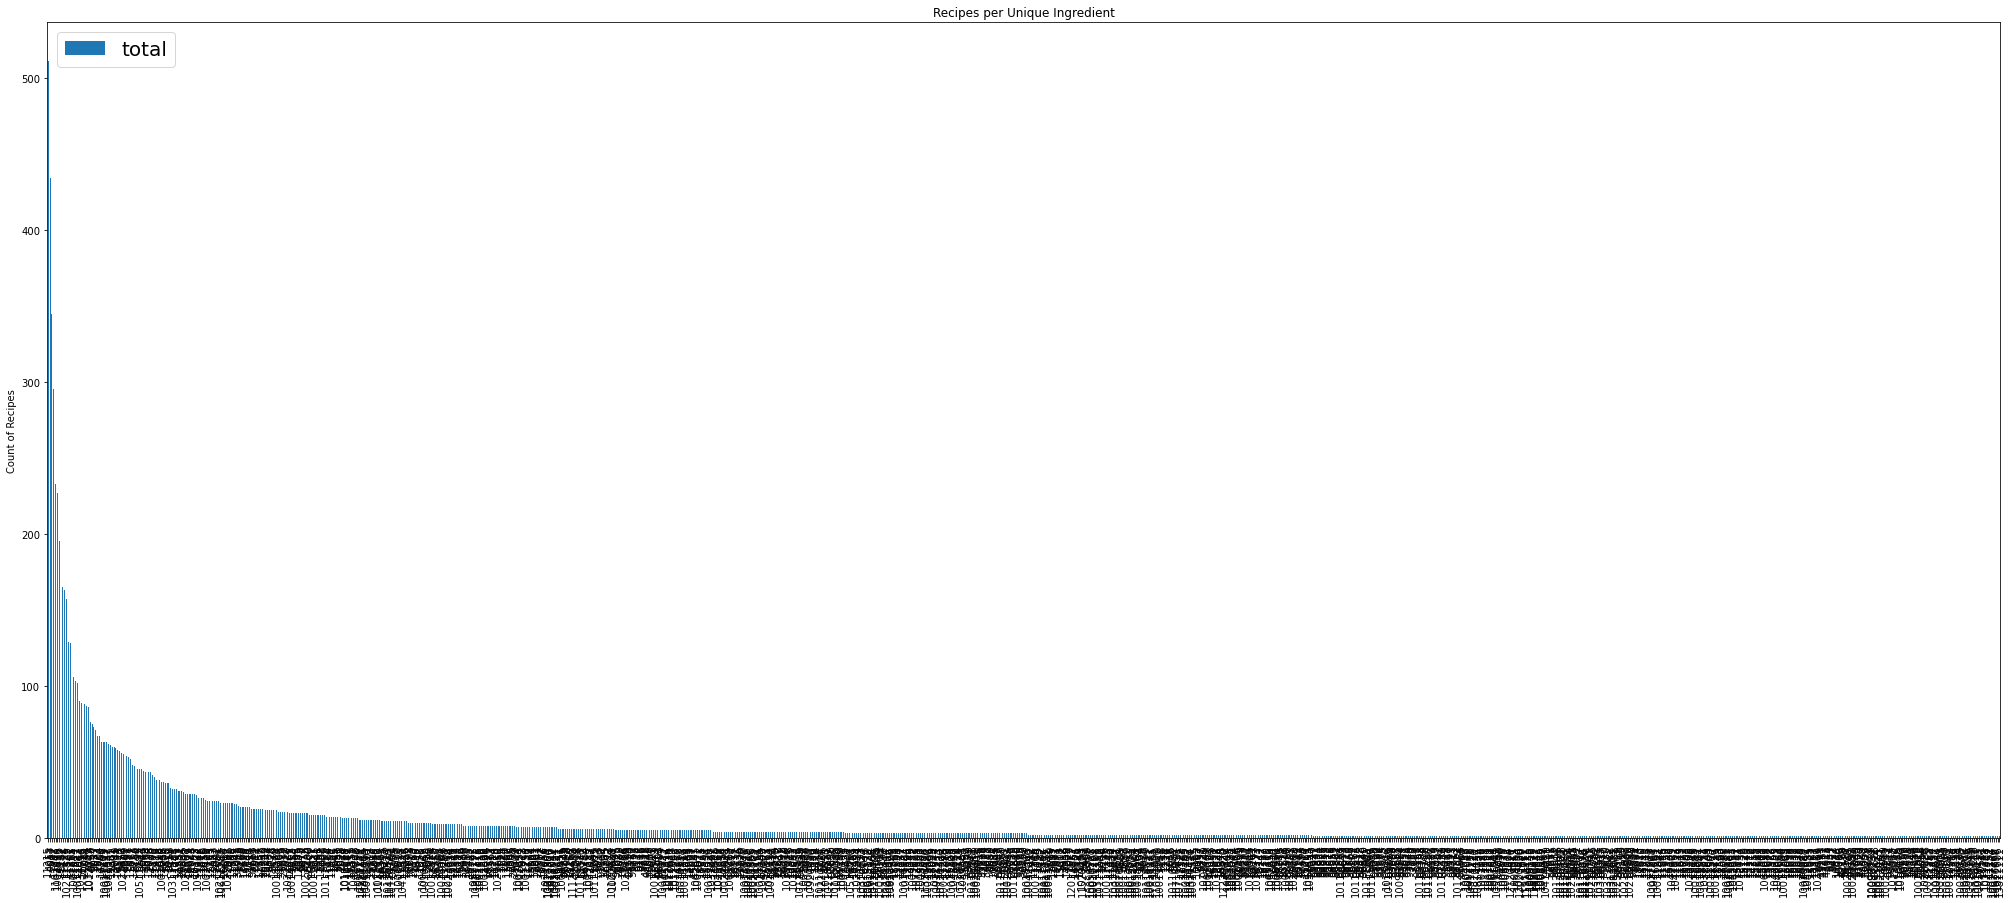

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(35,15)
subdata.sort_values(ascending=False).plot.bar(stacked=False)
plt.legend(loc=2, prop={'size': 20})
plt.ylabel("Count of Recipes")
plt.title("Recipes per Unique Ingredient")
plt.show()

In [ ]:
#len(uniqueingred)

In [ ]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***